# Better School Grades ╰(*°▽°*)╯ (A.K.A. BSG Model)
---

# I. Business Understanding

## Project Objective:

The goal of this project is to know which variables have the highest impact on student grades and how access to educational resources (such as extra classes and internet access) affects student grade outcomes.

### Key Questions:

1. Which variable has the highest impact on final grades?
2. How does access to educational resources (such as extra classes and internet access) affect student grade outcomes?
3. What are the top 5 variables that affect the final grades of students?

By answering these questions, we can help schools, educational institutions and students to better understand the factors that affect student grades and make informed decisions to improve student performance.

---


# II. Data Understanding
The dataset is available at the UCI Machine Learning Repository, with the following link: https://archive.ics.uci.edu/dataset/320/student+performance

## Additional Variable Information

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
    1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    2. sex - student's sex (binary: 'F' - female or 'M' - male)
    3. age - student's age (numeric: from 15 to 22)
    4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
    5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
    9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    16. schoolsup - extra educational support (binary: yes or no)
    17. famsup - family educational support (binary: yes or no)
    18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19. activities - extra-curricular activities (binary: yes or no)
    20. nursery - attended nursery school (binary: yes or no)
    21. higher - wants to take higher education (binary: yes or no)
    22. internet - Internet access at home (binary: yes or no)
    23. romantic - with a romantic relationship (binary: yes or no)
    24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    29. health - current health status (numeric: from 1 - very bad to 5 - very good)
    30. absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
    31. G1 - first period grade (numeric: from 0 to 20)
    31. G2 - second period grade (numeric: from 0 to 20)
    32 G3 - final grade (numeric: from 0 to 20, output target)

We will use G3 as the target variable for our analysis.

---

### Importing Libraries and Loading Data

In [192]:
import pandas as pd
from pandas import DataFrame
from ucimlrepo import fetch_ucirepo

student_performance = fetch_ucirepo(id=320)

X = student_performance.data.features
y = student_performance.data.targets


X.head(20)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,5,4,2,1,2,5,6
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,4,4,1,1,3,0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,1,1,2
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,4,2,2,1,1,1,0
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,yes,no,5,5,1,1,1,5,0


The dataset contains 649 records and 30 features.

In [193]:
X.shape, y.shape

((649, 30), (649, 3))

In [194]:
print(student_performance.variables)

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

The dataset contains student-related attributes, including demographic, academic, and behavioral characteristics. It includes both numerical and categorical values describing students' background, study habits, and extracurricular activities. The dataset also contains students' grades (G1, G2, and G3), which represent their performance in different periods, with G3 being the final grade. The dataset does not contain missing values.

---

# III. Data Preparation

We have discovered that these columns don't have much impact on the final grades of the students. So, we will drop these columns from the dataset.

`adress` `school` `famsize` `reason` `traveltime`

In [ ]:
y = y.loc[:, y.columns.difference(['G1', 'G2'])]

X = X.drop(['address', 'school', 'reason', 'traveltime', 'famsize'], axis=1)


,sex,age,Pstatus(LivingTogether),Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,0,4,4,at_home,teacher,mother,2,0,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,1,1,1,at_home,other,father,2,0,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,1,1,1,at_home,other,mother,2,0,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,1,4,2,health,services,mother,3,0,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,1,3,3,other,other,father,2,0,...,yes,no,no,4,3,2,1,2,5,0
5,M,16,1,4,3,services,other,mother,2,0,...,yes,yes,no,5,4,2,1,2,5,6
6,M,16,1,2,2,other,other,mother,2,0,...,yes,yes,no,4,4,4,1,1,3,0
7,F,17,0,4,4,other,teacher,mother,2,0,...,yes,no,no,4,1,4,1,1,1,2
8,M,15,0,3,2,services,other,mother,2,0,...,yes,yes,no,4,2,2,1,1,1,0
9,M,15,1,3,4,other,other,mother,2,0,...,yes,yes,no,5,5,1,1,1,5,0


We changed Pstatus to binary values, where T is 1 and A is 0. And we also changed its name to Pstatus(LivingTogether) to make it more understandable.

In [ ]:
#change column name Pstatus to Pstatus(LivingTogether)
X = X.rename(columns={'Pstatus': 'Pstatus(LivingTogether)'})
#change data in this column to 1 if it is T and 0 if it is A
X['Pstatus(LivingTogether)'] = X['Pstatus(LivingTogether)'].apply(lambda x: 1 if x == 'T' else 0)

X.head(20)

Handle possible missing values

In [196]:
from sklearn.preprocessing import StandardScaler

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert boolean columns to int
X = X.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

                              age  Pstatus(LivingTogether)      Medu  \
age                      1.000000                -0.005631 -0.107832   
Pstatus(LivingTogether) -0.005631                 1.000000 -0.057174   
Medu                    -0.107832                -0.057174  1.000000   
Fedu                    -0.121050                -0.031856  0.647477   
studytime               -0.008415                -0.008748  0.097006   
failures                 0.319968                -0.009881 -0.172210   
famrel                  -0.020559                 0.051303  0.024421   
freetime                -0.004910                 0.037585 -0.019686   
goout                    0.112805                 0.031086  0.009536   
Dalc                     0.134768                 0.041513 -0.007018   
Walc                     0.086357                 0.070976 -0.019766   
health                  -0.008750                 0.012638  0.004614   
absences                 0.149998                -0.117492 -0.00

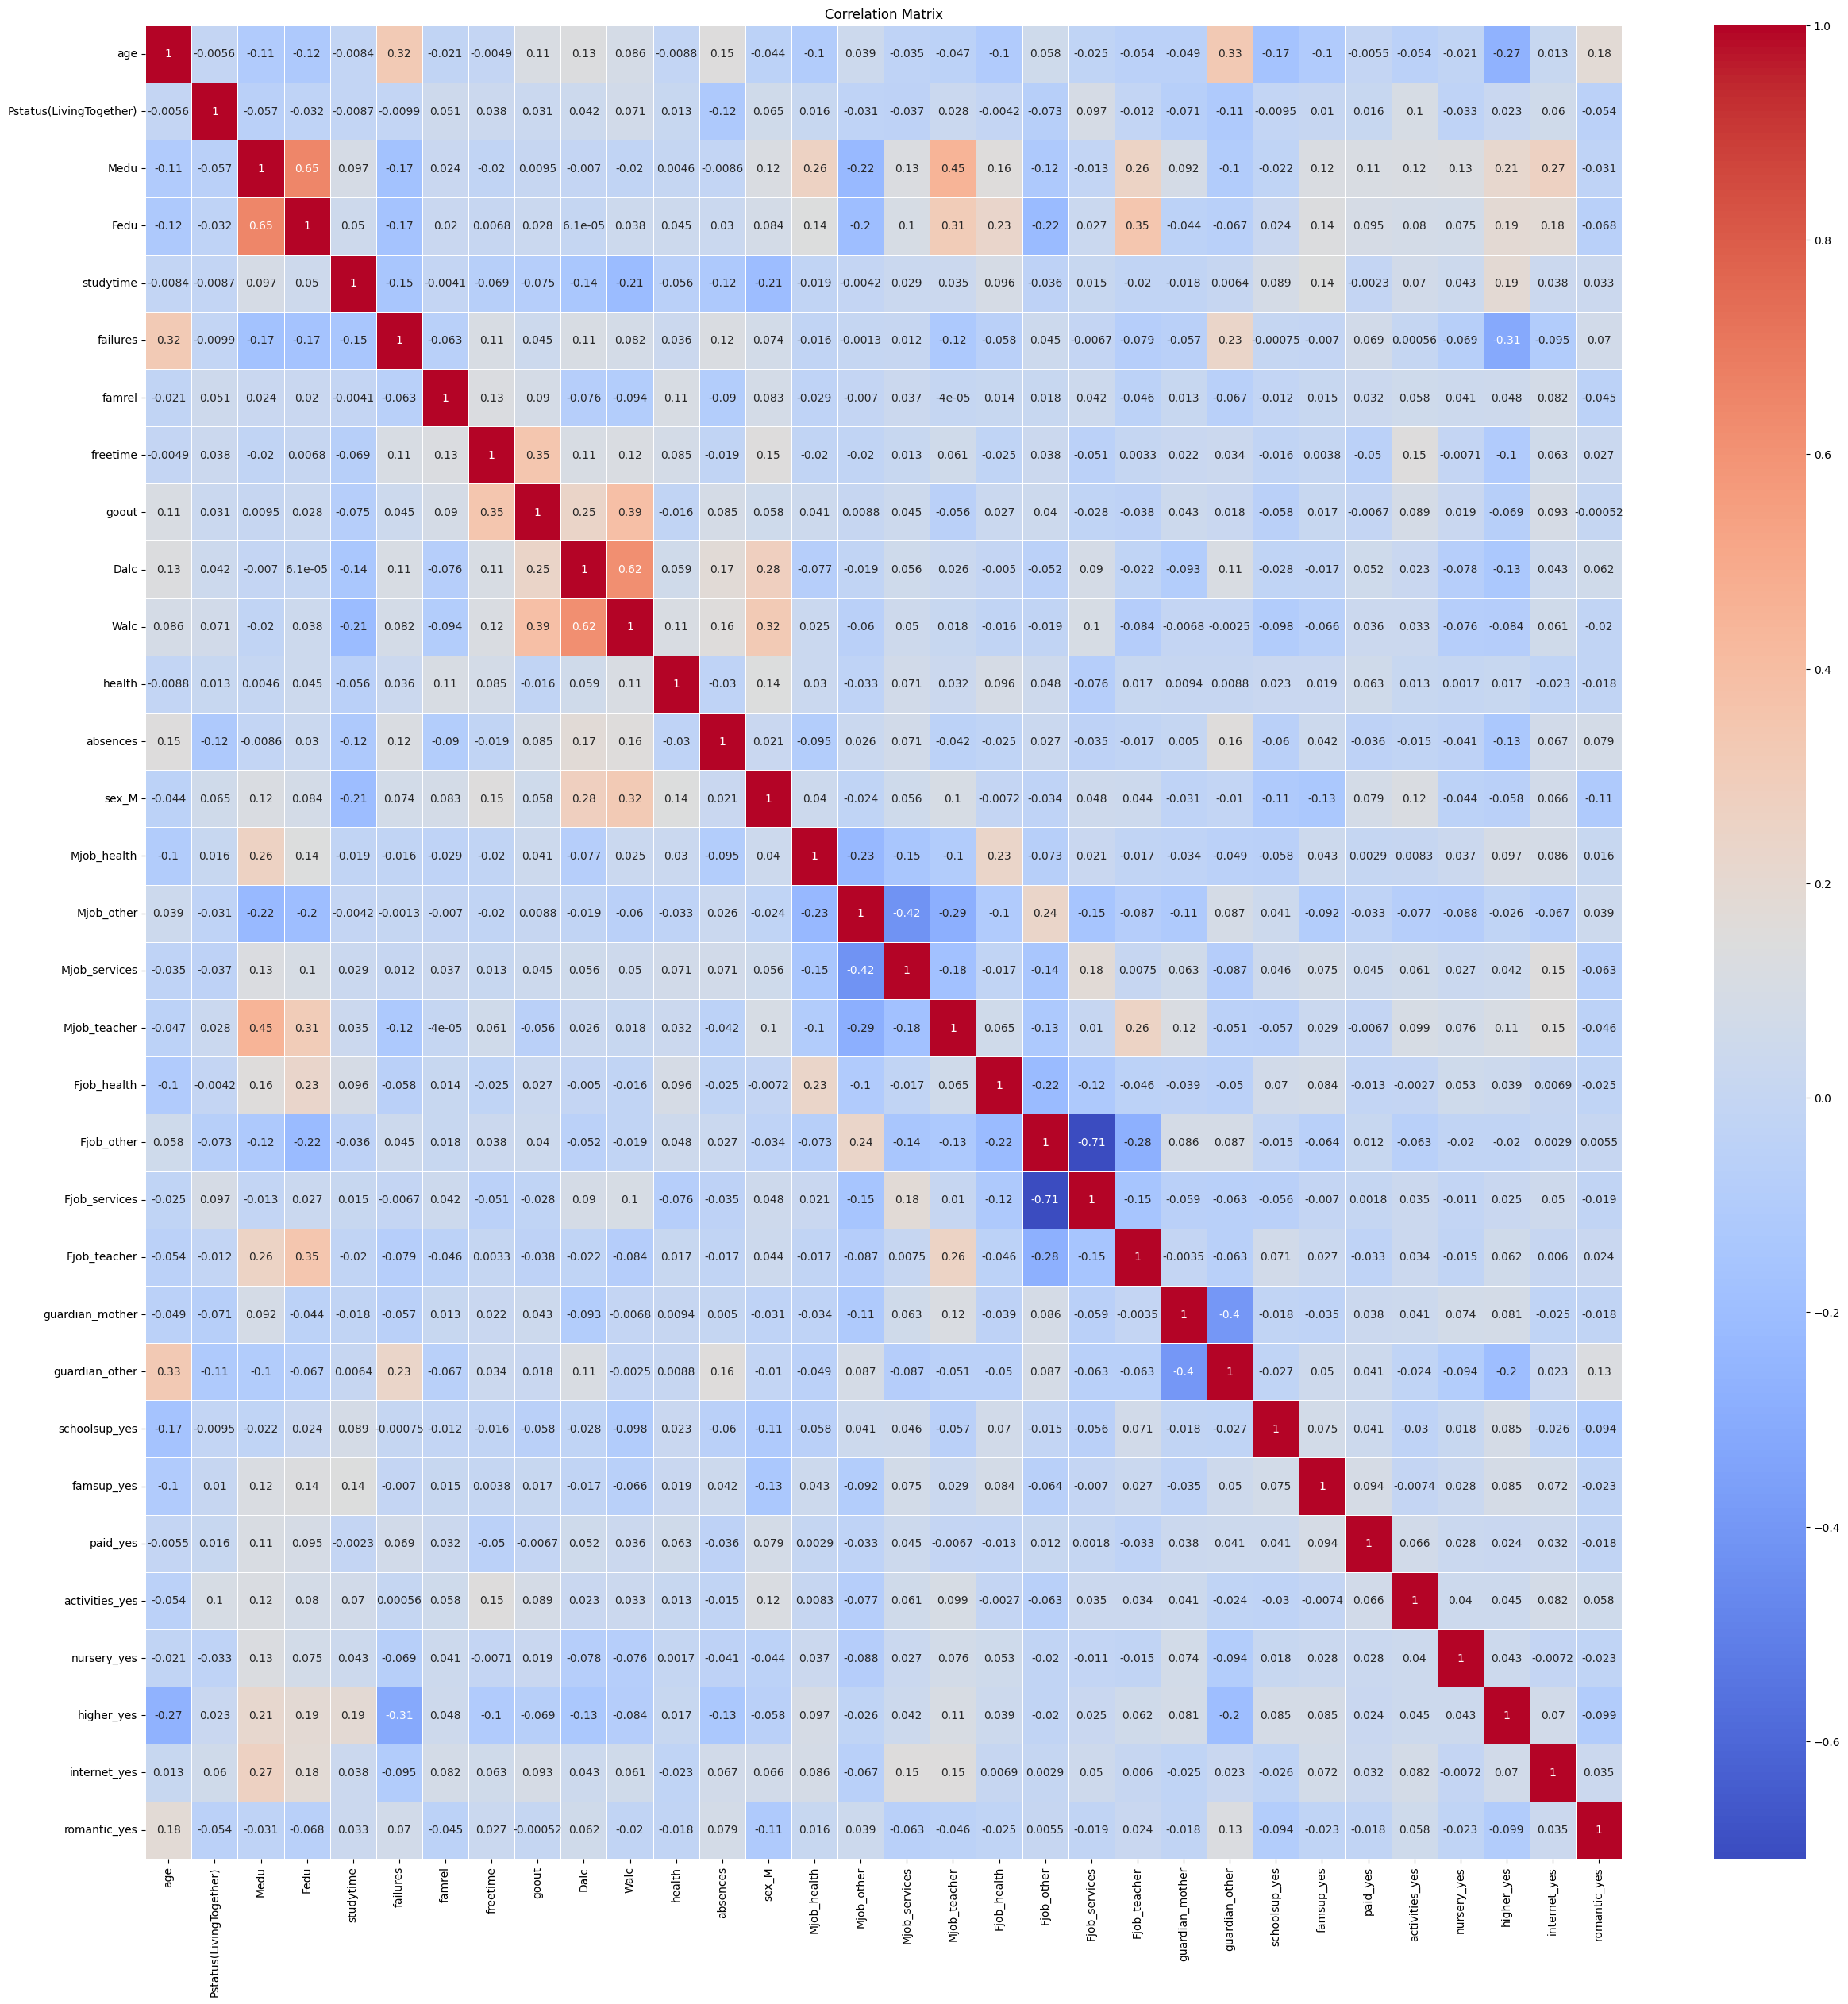

In [197]:
# Calculate the correlation matrix
corr_matrix = X.corr()

print(corr_matrix)

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [198]:
X.head(20)

,age,Pstatus(LivingTogether),Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,0,4,4,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,1,4,2,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,1,3,3,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
5,16,1,4,3,2,0,5,4,2,1,...,1,0,0,1,0,1,1,1,1,0
6,16,1,2,2,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,0,4,4,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,0,3,2,2,0,4,2,2,1,...,1,0,0,1,0,0,1,1,1,0
9,15,1,3,4,2,0,5,5,1,1,...,1,0,0,1,0,1,1,1,1,0


---

# IV. Modeling
Understand the relationship between alcohol usage, internet access and the grades of students.

In [199]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Use G3 as a regression target and G3 as a classification target
y_reg = y['G3']
y_class = y['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Split the data for regression and classification
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


---

# V. Evaluation

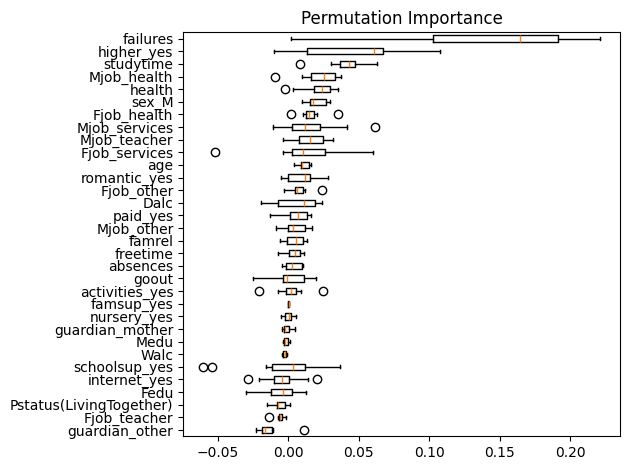

In [200]:
from sklearn.metrics import mean_absolute_error, r2_score

# Regression: Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train_reg)

# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(regressor, X_test, y_test_reg, n_repeats=10, scoring="r2", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()



In [201]:

b0 = regressor.intercept_  # Intercept (constant term)
b1 = regressor.coef_[0]  # Coefficients for each feature (array)
print("Intercept: %.2f" % b0 + ", Coefficient: %.4f" % b1)

y_pred_reg = regressor.predict(X_test)

print("MAE (Mean Absolute Error):", mean_absolute_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


Intercept: 11.88, Coefficient: 0.1455
MAE (Mean Absolute Error): 2.109992033060837
R² Score: 0.18866377662969613


In [202]:
from sklearn.metrics import accuracy_score, classification_report

randomForest = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True, max_samples=0.7, max_features=0.75)
randomForest.fit(X_train_class, y_train_class)

y_pred_randomForest = randomForest.predict(X_test_class)

print("Accuracy:", accuracy_score(y_test_class, y_pred_randomForest))
print(classification_report(y_test_class, y_pred_randomForest))


Accuracy: 0.9076923076923077
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.93      0.97      0.95       115

    accuracy                           0.91       130
   macro avg       0.78      0.72      0.74       130
weighted avg       0.90      0.91      0.90       130



In [203]:
# Print feature importance
print(randomForest.feature_importances_)
importances = randomForest.feature_importances_

[0.0540884  0.00695974 0.04910314 0.04993187 0.02230378 0.16461881
 0.06063483 0.0521511  0.04640828 0.04052594 0.04103018 0.04471085
 0.07305958 0.01300833 0.01818156 0.02167874 0.00804955 0.00275933
 0.00333335 0.01251588 0.01204703 0.00207961 0.01665576 0.0050029
 0.01879546 0.01581782 0.01737483 0.01757695 0.01713261 0.05292249
 0.01773887 0.02180243]


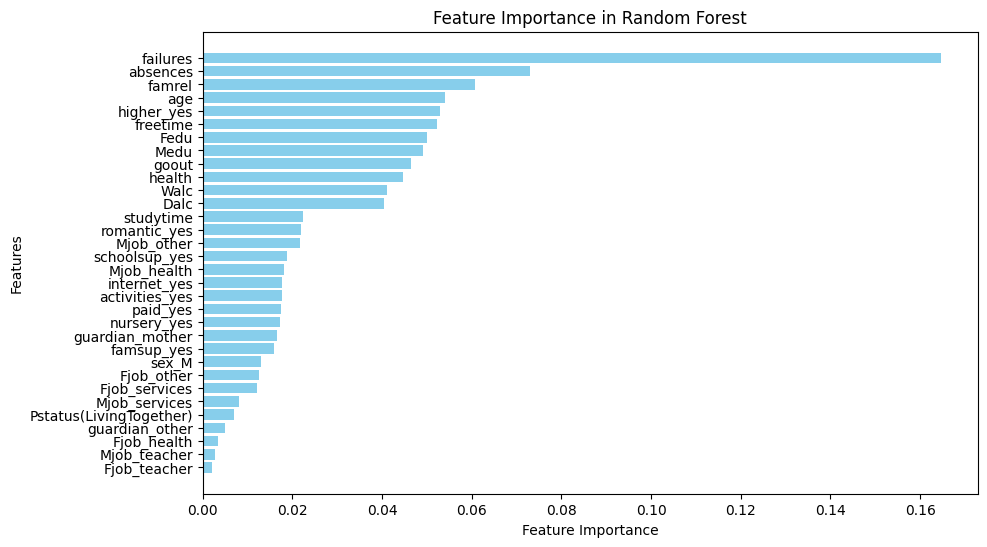

In [204]:
original_feature_names = X.columns

#Then use these original feature names in your importance code
importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot with the original feature names
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

---

# VI. Deployment / Conclusion

Main questions of this research were:
1. Which variable has the highest impact on final grades?
2. How does access to educational resources (such as extra classes and internet access) affect student grade outcomes?
3. What are the Top 5 variables that affect the final grades of students?

Answer to first question is that the variable that has the highest impact on final grades is the number of past class failures. The more failures a student has, the lower the final grade. And that was expected outcome.

Answer to second question is that access to educational resources such as extra classes and internet access has a positive impact on student grade outcomes. Study shows that students who have access to extra classes and internet at home tend to have higher grades. Consequently, schools and educational institutions should provide students with access to these resources to improve student performance. Correalation between study time and failirues is -0.15. This means that the more time students spend studying, the fewer failures they have and better their final grades become. And correalation between internet access and failures is -0.095. This means that students who have internet access at home tend to have fewer failures. Which means the same as the previous one.

Answer to third question is that the top 5 variables that affect the final grades of students are:
1. Number of past class failures
    - We have already discussed the past class failures so we will move onto explaining the other variables
2. Absences
    - Being absent from school has a negative impact on student grades. The more absences a student has, the lower the final grade. This is because students who are absent from school miss important lessons and learning opportunities, which can affect their academic performance.
3. Family Relationship Quality
    - Family relationship quality also has a significant impact on student grades. Students who have good family relationships tend to have higher grades. This is because a supportive and positive family environment can help students feel motivated and engaged in their studies.
4. Age
    - Age is another important factor that affects student grades. Older students tend to have lower grades compared to younger students. This is because older students may face more academic challenges and responsibilities, which can affect their academic performance. For example, older students may have to balance schoolwork with part-time jobs or other commitments such as family and children, which can impact their grades.
5. Higher Education
    - Finally, students who aspire to pursue higher education tend to have higher grades. This is because students who have clear academic goals and ambitions are more likely to be motivated and focused on their studies.

In conclusion, the findings of this study highlight the importance of various factors that affect student grades. By understanding these factors, schools, educational institutions, and students can make informed decisions to improve student performance and academic outcomes.